## Homework 02 - Nicholas Petr 

### 1 - Consider the following LP problem:
max (x) x2

−x1+x2≤1

−0.5x1+x2≤2

x1+x2≤9

0.5x1+x2≤6

x1≥0,x2≥0

### A. Use Julia's solver to find the solution.

In [1]:
using JuMP, GLPK

myModel = Model(GLPK.Optimizer)

@variable(myModel, x1 >= 0)
@variable(myModel, x2 >= 0)
@constraint(myModel, −x1 + x2 <= 1)
@constraint(myModel, -0.5 * x1 + x2 <= 2)
@constraint(myModel, x1 + x2 <= 9)
@constraint(myModel, 0.5 * x1 + x2 <= 6)
@objective(myModel, Max, x2)
print(myModel)

In [2]:
@time begin
    status = optimize!(myModel)
end
println("Objective value: ", JuMP.objective_value(myModel))
println("x2 = ", JuMP.value(x2))

  1.639288 seconds (4.57 M allocations: 357.941 MiB, 5.93% gc time, 99.95% compilation time)
Objective value: 4.0
x2 = 4.0


### B. What is the value of the objective function evaluated at the optimal solution?

The value of the objective function evaluated at the optimal solution is 4.

### C. Draw the constraints and the objective function at the optimal level.

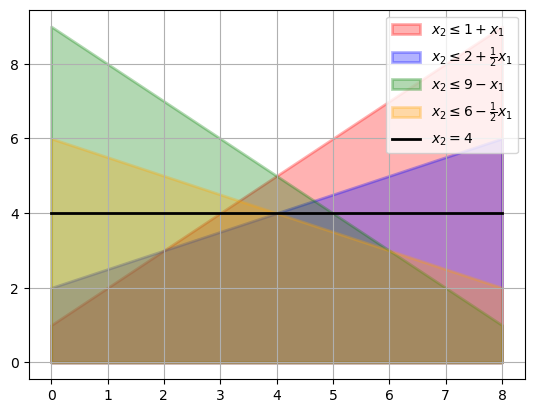

In [3]:
using PyPlot
clf();

x1 = collect(0:0.1:8);
x2a = 1 .+ x1;
x2b = ifelse.(2 .+ 0.5*x1 .>=0, 2 .+ 0.5*x1, NaN);
x2c = ifelse.(9 .- x1 .>=0, 9 .- x1, NaN);
x2d = ifelse.(6 .- 0.5*x1 .>=0, 6 .- 0.5*x1, NaN);
x2z =4 .- 0*x1

fig, ax = subplots();
ax.fill_between(x1,x2a,color="red",linewidth=2,label=L"x_{2} \leq 1 + x_{1}",alpha=0.3);
ax.legend(loc="upper right");
ax.fill_between(x1,x2b,color="blue",linewidth=2,label=L"x_{2} \leq 2 + \frac{1}{2}x_{1}",alpha=0.3);
ax.legend(loc="upper right");
ax.fill_between(x1,x2c,color="green",linewidth=2,label=L"x_{2} \leq 9 - x_{1}",alpha=0.3);
ax.legend(loc="upper right");
ax.fill_between(x1,x2d,color="orange",linewidth=2,label=L"x_{2} \leq 6 - \frac{1}{2}x_{1}",alpha=0.3);
ax.legend(loc="upper right");
ax.plot(x1,x2z,color="black",linewidth=2,label=L"x_{2} = 4",alpha=1);
ax.legend(loc="upper right");
ax.grid(true);

### D. Justify the optimal solution

Looking at the plot and optimal solution, we can see that 4 is the highest point within the feasible region and is also a corner solution, which makes it a viable answer for the optimized solution.

### 2 - Consider the following LP problem:

max (x) 6x1+4x2 

2x1+3x2≤9

x1≤3

x2≤2

x1≥0, x2≥0

### A. Use Julia's solver to find the solution.

In [4]:
using JuMP, GLPK

myModel = Model(GLPK.Optimizer)

@variable(myModel, x1 >= 0)
@variable(myModel, x2 >= 0)
@constraint(myModel, 2*x1 + 3*x2 <= 9)
@constraint(myModel, x1 <= 3)
@constraint(myModel, x2 <= 2)
@objective(myModel, Max, 6*x1 + 4*x2)
print(myModel)

In [5]:
@time begin
    status = optimize!(myModel)
end
println("Objective value: ", JuMP.objective_value(myModel))
println("x1 = ", JuMP.value(x1))
println("x2 = ", JuMP.value(x2))

  0.023032 seconds (13.82 k allocations: 752.462 KiB, 99.18% compilation time)
Objective value: 22.0
x1 = 3.0
x2 = 1.0


### B. What is the value of the objective function evaluated at the optimal solution?

The value of the objective function evaluated at the optimal solution is 22.

### C. Draw the constraints and the objective function at the optimal level.

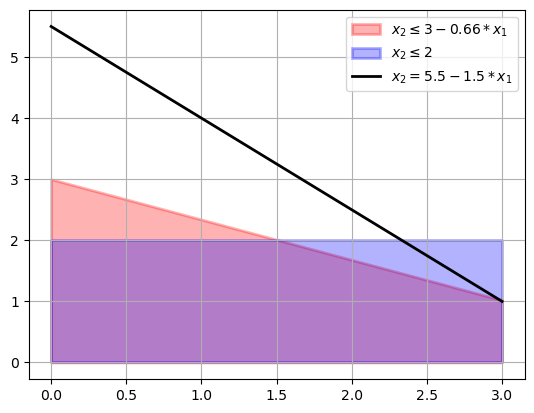

In [6]:
using PyPlot
clf();

x1 = collect(0:0.1:3);
x2a = ifelse.(3 .- 0.66*x1 .>=0, 3 .- 0.66*x1, NaN);
x2b = ifelse.(2 .- 0*x1 .>=0, 2 .- 0*x1, NaN);
x2z = ifelse.(5.5 .- 1.5*x1 .>=0, 5.5 .- 1.5*x1, NaN);

fig, ax = subplots();
ax.fill_between(x1,x2a,color="red",linewidth=2,label=L"x_{2} \leq 3 - 0.66*x_{1}",alpha=0.3);
ax.legend(loc="upper right");
ax.fill_between(x1,x2b,color="blue",linewidth=2,label=L"x_{2} \leq 2",alpha=0.3);
ax.legend(loc="upper right");
ax.plot(x1,x2z,color="black",linewidth=2,label=L"x_{2} = 5.5 - 1.5*x_{1}",alpha=1);
ax.legend(loc="upper right");

ax.grid(true);

### D. Justify the optimal solution

Looking at the plot and optimal solution, we can see that we have a corner solution that meets the required constraints, which makes it a viable answer for the optimization problem.

### 3 - Consider the following short-term financing problem of a corporation. The treasury deparment determined the company's net cash flow as described in the table identified in Homework 2

The company has two methods to conduct short-term financing. It can borrow up to $100k monthly at a  0.5%  interest rate per month. It can also issue a 3-month zero-coupon bond at  1.5%  for a three month period. Any available cash at the end of each month can earn  0.2%  interest rate per month.

### A. For each month, find the amount of borrowing between the two instruments that maximizes the total amount of cash available in December 2013.

In [7]:
using JuMP, GLPK

myModel = Model(GLPK.Optimizer)

#variable
@variable(myModel, x1>= 0)
@variable(myModel, x2>= 0)
@variable(myModel, x3>= 0)
@variable(myModel, x4>= 0)
@variable(myModel, x5>= 0)
@variable(myModel, y1>= 0)
@variable(myModel, y2>= 0)
@variable(myModel, y3>= 0)
@variable(myModel, z1>= 0)
@variable(myModel, z2>= 0)
@variable(myModel, z3>= 0)
@variable(myModel, z4>= 0)
@variable(myModel, z5>= 0)
@variable(myModel, v)


#constraints 
@constraint(myModel, x1 + y1 - z1 == 250)
@constraint(myModel, x2 + y2 - 1.005*x1 + 1.002*z1 - z2 == 50)
@constraint(myModel, x3 + y3 - 1.005*x2 + 1.002*z2 - z3 == -225)
@constraint(myModel, x4 - 1.015*y1 - 1.005*x3 + 1.002*z3 - z4 == 175)
@constraint(myModel, x5 - 1.015*y2 - 1.005*x4 + 1.002*z4 - z5 == -150)
@constraint(myModel, -1.015*y3 - 1.005*x5 + 1.002*z5 - v == -400)
@constraint(myModel, x1 <= 100)
@constraint(myModel, x2 <= 100)
@constraint(myModel, x3 <= 100)
@constraint(myModel, x4 <= 100)
@constraint(myModel, x5 <= 100)

#objective
@objective(myModel, Max, v)
print(myModel)

In [8]:
@time begin
    status = optimize!(myModel)
end
println("Amount Borrowed: ")
println("x1 = ", JuMP.value(x1))
println("x2 = ", JuMP.value(x2))
println("x3 = ", JuMP.value(x3))
println("x4 = ", JuMP.value(x4))
println("x5 = ", JuMP.value(x5))

println("\nAmount from issuing 3-month bonds: ")
println("y1 = ", JuMP.value(y1))
println("y2 = ", JuMP.value(y2))
println("y3 = ", JuMP.value(y3))

println("\nExcess Funds: ")
println("z1 = ", JuMP.value(z1))
println("z2 = ", JuMP.value(z2))
println("z3 = ", JuMP.value(z3))
println("z4 = ", JuMP.value(z4))
println("z5 = ", JuMP.value(z5))

println("\nObjective value: ", JuMP.objective_value(myModel))
println("v = ", JuMP.value(v))

  0.086401 seconds (90.66 k allocations: 4.826 MiB, 99.53% compilation time)
Amount Borrowed: 
x1 = 100.00000000000001
x2 = 100.00000000000001
x3 = 0.0
x4 = 100.0
x5 = 1.7574999999999759

Amount from issuing 3-month bonds: 
y1 = 149.99999999999997
y2 = 50.499999999999986
y3 = 102.2964071856287

Excess Funds: 
z1 = 0.0
z2 = 0.0
z3 = 226.79640718562868
z4 = 0.0
z5 = 0.0

Objective value: 294.4028592065869
v = 294.4028592065869


### B. What is the optimal amount of cash on Dec 2013?

In [9]:
@time begin
    status = optimize!(myModel)
end
println("Objective value: ", JuMP.objective_value(myModel))
println("v = ", JuMP.value(v))

  0.000026 seconds (2 allocations: 32 bytes)
Objective value: 294.4028592065869
v = 294.4028592065869


The optimal amount of cash on Dec 2013 is 294.40

### C. Interpret the results and develop a storyline implied by the LP solution

As indicated, the primary goal here is to outline an optimal combination of financial instruments to meet requirements related to financing short term cash commitments. By combining the net cash flow, available credit, and various interest rates we can develop a list of decision variables, constraints and objectives. These can then be developed into a linear programming problem. Looking at the results, we can analyze the JuMP values to help us determine the amount borrowed, amount via issuance of 3-month bonds, and excess funds that can maximize our objective function, which is available cash in December. We can then see the optimal amount of cash for December 2013. By running these variables through an LP solution, we are now able to set our instruments in a way that can lead to the optimized result. 